<center><h1>Analyzing Automobile Fuel Economy Data</h1></center>

### QUESTION: Are Toyota vehicles more fuel efficient than Honda vehicles?

**To answer this question, I found a government web site that has the data I was looking for:**

Data source: [http://www.fueleconomy.gov/feg/ws/index.shtml](http://www.fueleconomy.gov/feg/ws/index.shtml)<br>
Data file: [http://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip](http://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip)<br>
Data meta data: [http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle](http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle)

In this notebook, I'll be using the Python programming language to profile, summarize, and visualize the data.

#### I've installed the usual packages for data analyis and plotting:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
plt.style.use('ggplot')

/home/pybokeh/miniconda3/envs/jupyter/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Read the downloaded csv file as input
vehicles = pd.read_csv('/home/pybokeh/temp/vehicles.csv')

/home/pybokeh/miniconda3/envs/jupyter/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Let's profile our data set

In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36792 entries, 0 to 36791
Data columns (total 83 columns):
barrels08          36792 non-null float64
barrelsA08         36792 non-null float64
charge120          36792 non-null float64
charge240          36792 non-null float64
city08             36792 non-null int64
city08U            36792 non-null float64
cityA08            36792 non-null int64
cityA08U           36792 non-null float64
cityCD             36792 non-null float64
cityE              36792 non-null float64
cityUF             36792 non-null float64
co2                36792 non-null int64
co2A               36792 non-null int64
co2TailpipeAGpm    36792 non-null float64
co2TailpipeGpm     36792 non-null float64
comb08             36792 non-null int64
comb08U            36792 non-null float64
combA08            36792 non-null int64
combA08U           36792 non-null float64
combE              36792 non-null float64
combinedCD         36792 non-null float64
combinedUF         36

**Se we have 36,792 rows and 83 columns of data. If you want to know the description of the data each column contains, the metadata can be viewed [here](http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle)**

### Let's look at the first 5 rows of data

In [43]:
vehicles.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.689436,0,0,0,19,0,0,0,0,0,0,-1,-1,0,423.190476,21,0,0,0,0,0,0,4,2.0,Rear-Wheel Drive,9011,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0,0,0,0,0,0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0,0,0,0,Manual 5-spd,23.3333,0,35.0000,0,Two Seaters,1985,-1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.950562,0,0,0,9,0,0,0,0,0,0,-1,-1,0,807.909091,11,0,0,0,0,0,0,12,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3050,0,Regular,Regular Gasoline,-1,-1,14,0,0,0,0,0,0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0,0,0,0,Manual 5-spd,11.0000,0,19.0000,0,Two Seaters,1985,-8500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.195570,0,0,0,23,0,0,0,0,0,0,-1,-1,0,329.148148,27,0,0,0,0,0,0,4,2.2,Front-Wheel Drive,2100,(FFS),-1,1250,0,Regular,Regular Gasoline,-1,-1,33,0,0,0,0,0,0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0,0,0,0,Manual 5-spd,29.0000,0,47.0000,0,Subcompact Cars,1985,500,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.950562,0,0,0,10,0,0,0,0,0,0,-1,-1,0,807.909091,11,0,0,0,0,0,0,8,5.2,Rear-Wheel Drive,2850,NaN,-1,3050,0,Regular,Regular Gasoline,-1,-1,12,0,0,0,0,0,0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0,0,0,0,Automatic 3-spd,12.2222,0,16.6667,0,Vans,1985,-8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.337486,0,0,0,17,0,0,0,0,0,0,-1,-1,0,467.736842,19,0,0,0,0,0,0,4,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2100,0,Premium,Premium Gasoline,-1,-1,23,0,0,0,0,0,0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0,0,0,0,Manual 5-spd,21.0000,0,32.0000,0,Compact Cars,1993,-3750,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### If you rather observe the columns vertically, we can transpose just the 1st 3 rows of the dataframe:

In [44]:
vehicles.head(3).transpose()

,0,1,2
barrels08,15.6894,29.9506,12.1956
barrelsA08,0,0,0
charge120,0,0,0
charge240,0,0,0
city08,19,9,23
city08U,0,0,0
cityA08,0,0,0
cityA08U,0,0,0
cityCD,0,0,0
cityE,0,0,0


#### Let's say you are wondering how the overall combined fuel economy (highway + city) has improved with each successive model year of gasoline-based automobiles, how would you find out?

Looking at the data [metadata](http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle), looks like I need to filter based off of "fuelType", "fuelType1", "fuelType2", and "atvType".

**Looks like we can't filter using "fuelType" since there are categories like "Gasoline and natural gas" which we don't want if we're just looking for gas only vehicles.**

In [45]:
vehicles.fuelType.value_counts()

Regular                        24616
Premium                         9524
Gasoline or E85                 1164
Diesel                          1090
Premium or E85                   116
Electricity                       95
Midgrade                          61
CNG                               60
Gasoline or natural gas           20
Premium Gas or Electricity        14
Regular Gas and Electricity       14
Premium and Electricity            9
Gasoline or propane                8
Regular Gas or Electricity         1
Name: fuelType, dtype: int64

**Looks like we can use "fuelType1" as the primary column to filter with**

In [46]:
vehicles.fuelType1.value_counts()

Regular Gasoline     25823
Premium Gasoline      9663
Diesel                1090
Electricity             95
Midgrade Gasoline       61
Natural Gas             60
Name: fuelType1, dtype: int64

In [47]:
vehicles.fuelType2.value_counts()

E85            1280
Electricity      38
Natural Gas      20
Propane           8
Name: fuelType2, dtype: int64

In [48]:
vehicles.atvType.value_counts()

FFV               1280
Diesel            1018
Hybrid             424
EV                  95
CNG                 50
Plug-in Hybrid      38
Bifuel (CNG)        20
Bifuel (LPG)         8
Name: atvType, dtype: int64

In [49]:
vehicles.cylinders.value_counts()

4     14032
6     12845
8      8111
5       766
12      534
3       200
10      145
2        53
16        8
Name: cylinders, dtype: int64

### Our first attempt to filter our data to just gasoline powered vehicles

In [50]:
# Ensure automobile only takes gasoline as fuel
criteria1 = vehicles.fuelType1.isin(['Regular Gasoline','Premium Gasoline','Midgrade Gasoline'])

# Ensure it doesn't have a secondary fuel source
criteria2 = vehicles.fuelType2.isnull()

# I noticed after applying criteria 1 and 2, there were hybrids in my list under the atvType column
# So I want to ensure hybrids are excluded as well
criteria3 = vehicles.atvType.isnull()

criteria4 = vehicles.cylinders == 4

criteria5 = vehicles.cylinders == 6

criteria6 = vehicles.year == 2016

In [51]:
# Apply the criteria
mainstream_vehicles = vehicles[criteria1 & criteria2 & criteria3 & (criteria4 |  criteria5) & ~criteria6]

**Let's double-check that we have indeed limited the data to 4 and 6 cylinders**

In [52]:
mainstream_vehicles.cylinders.value_counts()

4    12800
6    11839
Name: cylinders, dtype: int64

### Let's double-check that we don't have non-gasoline models in our data set

Since I am mostly familiar with Hondas, let's filter our data to just Honda vehicles

In [53]:
only_honda = mainstream_vehicles['make']=='Honda'

# Apply the criteria
honda = mainstream_vehicles[only_honda]
honda.model.value_counts()

Civic                   151
Accord                  135
Prelude                  70
Odyssey                  30
CR-V 4WD                 29
Civic CRX                29
Fit                      24
Passport 2WD             22
Civic Wagon              21
CR-V 2WD                 20
Accord Wagon             20
Accord Coupe             20
Passport 4WD             18
Element 4WD              18
Element 2WD              17
Civic CRX HF             14
Civic Del Sol            14
Pilot 4WD                13
Civic HX                 12
Pilot 2WD                10
S2000                    10
Civic Wagon 4WD          10
Del Sol                  10
Ridgeline Truck 4WD       9
Civic HB VX               8
Crosstour 2WD             8
Civic HF                  4
Crosstour 4WD             4
Accord Crosstour 4WD      2
Accord Crosstour 2WD      2
Name: model, dtype: int64

**Looks good to me.  I don't see the Insight or hybrid models in the list.**

### OK, so let's chart the average overall combined MPG from all makes and models

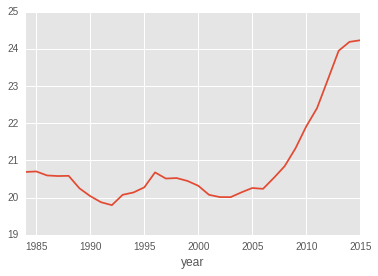

In [54]:
# Group the data by model year
by_year = mainstream_vehicles.pivot_table(values='comb08', index='year', aggfunc=np.mean)
by_year.plot()
plt.show()

**If you're wondering why the decline in fuel economy starting around mid-90s, more weight was subsequently added to the vehicles as more safety features were added (additional airbags, reinforced metals in frames and doors).  Also, during this time, is the introduction of more SUVs and minivans.  Sadly, the data set does not include vehicle weight which would have been nice to compare MPG on a per unit of weight basis.**

## Let's compare combined (city + hwy) average overall mpg of gasonline-based Honda vs Toyota

In [55]:
criteria = mainstream_vehicles.make.isin(['Honda','Toyota'])
honda_toyota_vehicle_non_hybrid = mainstream_vehicles[criteria]

In [56]:
# I'll perform a pandas pivot table on model year versus make
honda_toyota_average = honda_toyota_vehicle_non_hybrid.pivot_table('comb08', index='year',
    columns='make', aggfunc='mean')

### Let's view just the first 5 rows of data

In [57]:
honda_toyota_average.head()

make,Honda,Toyota
year,,
1984,28.083333,23.044118
1985,26.906250,22.925926
1986,27.650000,21.660714
1987,27.750000,21.875000
1988,27.791667,21.422535


### Now, let's plot this data!

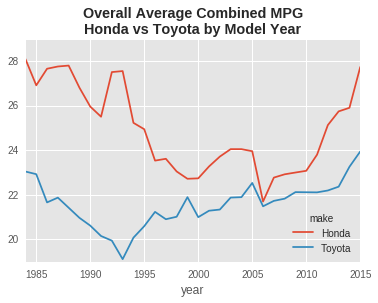

In [58]:
honda_toyota_average.plot()
plt.title("Overall Average Combined MPG\nHonda vs Toyota by Model Year", weight='bold')
plt.show()

**Looks like Toyota has lagged behind Honda for most of the years.  But I wonder if it is because Toyota has so many large trucks.  Also too bad the data source does not have vehicle weight.**

### So to make things fair, let's limit our Honda/Toyota data to just smaller vehicles, SUVs, and minivans:

- Compact Cars
- Subcompact Cars
- Midsize Cars
- Large Cars
- Sport Utility Vehicle - 4WD
- Sport Utility Vehicle - 2WD
- Minivan - 2WD
- Minivan - 4WD

Looking at the [metadata](http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle) again, we can filter by vehicle class using the VClass column.

In [59]:
honda_toyota_vehicle_non_hybrid.VClass.value_counts()

Subcompact Cars                       465
Compact Cars                          289
Small Station Wagons                  188
Midsize Cars                          160
Sport Utility Vehicle - 4WD           157
Sport Utility Vehicle - 2WD           140
Standard Pickup Trucks                127
Two Seaters                           114
Special Purpose Vehicles              107
Standard Pickup Trucks 2WD             81
Minicompact Cars                       72
Standard Pickup Trucks 4WD             62
Small Pickup Trucks                    54
Vans                                   54
Minivan - 2WD                          46
Small Pickup Trucks 2WD                38
Large Cars                             33
Small Sport Utility Vehicle 2WD        30
Small Pickup Trucks 4WD                29
Special Purpose Vehicle 2WD            25
Small Sport Utility Vehicle 4WD        25
Special Purpose Vehicle 4WD            18
Midsize-Large Station Wagons           16
Minivan - 4WD                     

In [60]:
criteria = honda_toyota_vehicle_non_hybrid.VClass.str.contains('Compact Cars|Subcompact Cars|Midsize Cars|Large Cars|Sport Utility|Minivan')

honda_toyota_mainstream = honda_toyota_vehicle_non_hybrid[criteria]

honda_toyota_mainstream_avg = honda_toyota_mainstream.pivot_table('comb08', index='year',
    columns='make', aggfunc='mean')

### Before we plot the data, let's make sure we got the data we expect

In [61]:
honda_toyota_mainstream.VClass.value_counts()

Subcompact Cars                       465
Compact Cars                          289
Midsize Cars                          160
Sport Utility Vehicle - 4WD           157
Sport Utility Vehicle - 2WD           140
Minivan - 2WD                          46
Large Cars                             33
Small Sport Utility Vehicle 2WD        30
Small Sport Utility Vehicle 4WD        25
Minivan - 4WD                          12
Standard Sport Utility Vehicle 4WD      9
Standard Sport Utility Vehicle 2WD      3
Name: VClass, dtype: int64

### Looks to be ok, so let's plot the data

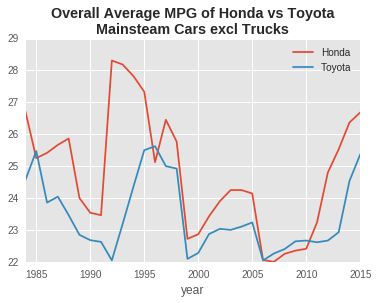

In [62]:
honda_toyota_mainstream_avg.plot()
plt.title("Overall Average MPG of Honda vs Toyota\nMainsteam Cars excl Trucks", weight='bold')
plt.legend(loc='best')
plt.show()

### Even though we limited our data to just smaller cars, SUVs, and minivans, for most model years, Honda vehicles are still more fuel efficient than Toyota vehicles.  2016 data should be disregarded since it is incomplete data.